In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import imageio
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv3D, MaxPooling3D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

2024-05-27 14:28:36.033570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 14:28:36.086614: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 14:28:36.089448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/infor/miniconda3/envs/torch/lib/python3.9/site-packages/cv2/../../lib64:
2024-05-27 14:28:36.089459: 

In [3]:
K.set_image_data_format('channels_first')
image_rows, image_columns, image_depth = 64, 64, 96
look_frames = int(image_depth / 2)
num_classes = 3

process_detect = False
version = True

training_list = np.load('images_new.npy')

training_list = np.asarray(training_list)
trainingsamples = len(training_list)

# Setting labels
traininglabels = np.zeros((trainingsamples,), dtype=int)
if version:
    traininglabels[0:50] = 0  # 50 video clips (anger)
    traininglabels[50:178] = 1  # 128 video clips (happiness)
    traininglabels[178:228] = 2  # 50 video clips (disgust)
else:
    traininglabels[0:8] = 0  # 8 video clips (anger)
    traininglabels[8:23] = 1  # 15 video clips (happiness)
    traininglabels[23:39] = 2  # 16 video clips (disgust)
traininglabels = np_utils.to_categorical(traininglabels, num_classes)  # one-hot encoding

# Convert data to 5D
training_set = np.zeros((trainingsamples, 1, image_rows, image_columns, image_depth))
for h in range(trainingsamples):
    training_set[h][0][:][:][:] = training_list[h, :, :, :]
print(training_set.shape)

# Normalize data
training_set = training_set.astype('float32')
training_set -= np.mean(training_set)
training_set /= np.max(training_set)

(228, 1, 64, 64, 96)


In [4]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.bias1 = np.random.rand(hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias2 = np.random.rand(output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        return self.softmax(self.z2)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def backward(self, x, y, output, learning_rate):
        output_error = output - y
        d_weights2 = np.dot(self.a1.T, output_error)
        d_bias2 = np.sum(output_error, axis=0)
        hidden_error = np.dot(output_error, self.weights2.T) * (self.a1 > 0)
        d_weights1 = np.dot(x.T, hidden_error)
        d_bias1 = np.sum(hidden_error, axis=0)
        self.weights1 -= learning_rate * d_weights1
        self.bias1 -= learning_rate * d_bias1
        self.weights2 -= learning_rate * d_weights2
        self.bias2 -= learning_rate * d_bias2

In [5]:
def fed_avg(models):
    avg_model = SimpleNN(input_size, hidden_size, output_size)
    num_models = len(models)
    avg_model.weights1 = np.mean([model.weights1 for model in models], axis=0)
    avg_model.bias1 = np.mean([model.bias1 for model in models], axis=0)
    avg_model.weights2 = np.mean([model.weights2 for model in models], axis=0)
    avg_model.bias2 = np.mean([model.bias2 for model in models], axis=0)
    return avg_model


In [6]:
def generate_data(num_samples, input_size, output_size):
    X = np.random.rand(num_samples, input_size)
    y = np.eye(output_size)[np.random.choice(output_size, num_samples)]
    return X, y



In [7]:
def train(model, X, y, epochs, learning_rate):
    for epoch in range(epochs):
        output = model.forward(X)
        model.backward(X, y, output, learning_rate)

Round 1 complete
Round 2 complete
Round 3 complete
Round 4 complete
Round 5 complete
Round 6 complete
Round 7 complete
Round 8 complete
Round 9 complete
Round 10 complete
Round 11 complete
Round 12 complete
Round 13 complete
Round 14 complete
Round 15 complete
Round 16 complete
Round 17 complete
Round 18 complete
Round 19 complete
Round 20 complete
Round 21 complete
Round 22 complete
Round 23 complete
Round 24 complete
Round 25 complete
Round 26 complete
Round 27 complete
Round 28 complete
Round 29 complete
Round 30 complete
Round 31 complete
Round 32 complete
Round 33 complete
Round 34 complete
Round 35 complete
Round 36 complete
Round 37 complete
Round 38 complete
Round 39 complete
Round 40 complete
Round 41 complete
Round 42 complete
Round 43 complete
Round 44 complete
Round 45 complete
Round 46 complete
Round 47 complete
Round 48 complete
Round 49 complete
Round 50 complete
Accuracy: 0.5614
              precision    recall  f1-score   support

           0       0.00      0.00    

/home/infor/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infor/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/infor/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

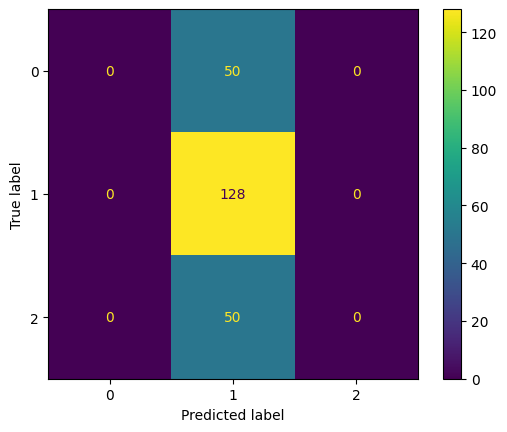

In [8]:
# Main federated learning training loop
NUM_CLIENTS = 10
NUM_ROUNDS = 50
input_size = image_rows * image_columns * image_depth  # Example input size
hidden_size = 64  # Example hidden layer size
output_size = num_classes  # Example number of classes
learning_rate = 0.1
epochs = 5

# Initialize models for each client
client_models = [SimpleNN(input_size, hidden_size, output_size) for _ in range(NUM_CLIENTS)]

# Prepare training data for each client
X_train_list = []
y_train_list = []
for i in range(NUM_CLIENTS):
    X_train = training_set[i::NUM_CLIENTS].reshape(-1, input_size)
    y_train = traininglabels[i::NUM_CLIENTS]
    X_train_list.append(X_train)
    y_train_list.append(y_train)

for round_num in range(NUM_ROUNDS):
    # Simulate client training
    for client_model, X_train, y_train in zip(client_models, X_train_list, y_train_list):
        train(client_model, X_train, y_train, epochs, learning_rate)

    # Aggregate the models using FedAvg
    global_model = fed_avg(client_models)

    # Update client models with the global model
    for client_model in client_models:
        client_model.weights1 = np.copy(global_model.weights1)
        client_model.bias1 = np.copy(global_model.bias1)
        client_model.weights2 = np.copy(global_model.weights2)
        client_model.bias2 = np.copy(global_model.bias2)

    print(f'Round {round_num + 1} complete')

# Example of using the trained global model
X_test = training_set.reshape(trainingsamples, -1)
y_test = traininglabels
predictions = global_model.forward(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(true_labels, predicted_labels))

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(output_size))
disp.plot()
plt.show()